In [13]:
import numpy as np
import math
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
import time
import random


class SAnnealing(object):

    def __init__(self, domain, step = 1, final_temperature=0.1, temperature = 100, alpha=0.95, equilibrium=10, time = 0, limited_decimals = 1, capacity = 5, data = [], best_solution = []):
        self.domain = domain
        self.step = step
        self.temperature = temperature
        self.final_temperature = final_temperature
        self.alpha = alpha
        self.equilibrium = equilibrium
        self.time = time
        self.limited_decimals = limited_decimals
        self.capacity = capacity
        self.data = data
        self.best_solution = best_solution
        self.best_cost = 0

    def cost_function(self, f, x):
        return f(self.data, x)

    def getTotalDemand(self, data):
        totalDemand = 0
        for element in self.data:
            totalDemand += element[2]
        return totalDemand

    def CVRP_function(routes):
        distance = 0
        for i in np.arange(len(routes)-1):
            distance += np.sqrt((routes[i][0] - routes[i+1][0])**2 + (routes[i][1] - routes[i+1][1])**2)
        return distance

    def getAllDistances(self, routes):
        allDistances = 0
        for route in routes:
            coordenates = []
            coordenates.append(self.data[0][1])
            for node in route:
                coordenates.append(self.data[node][1])
            coordenates.append(self.data[0][1])
            allDistances += CVRP_function(coordenates)
        return allDistances

    def getDemand(self, route):
        demand = 0
        for node in route:
            demand += self.data[node][2]
        return demand

    def create_first_solution(self):
        totalDemand = self.getTotalDemand(self.data)

        totalCars = math.ceil(totalDemand / self.capacity)

        while(1):
            routes = []
            for i in np.arange(totalCars):
                routes.append([])
            respaldRoutes = routes.copy()
            demands = []
            for i in np.arange(len(self.data) - 1):
                index = random.randint(0,(totalCars -1))
                routes[index].append(i+1)

            for route in routes:
                demands.append(self.getDemand(route))
            
            isUnderDemand = True
            for demand in demands:
                if(demand > self.capacity):
                    isUnderDemand = False

            if(isUnderDemand):
                break

        #return routes
        return [[15, 17, 9, 3, 16, 29],
                [12, 5, 26, 7, 8, 13, 32, 2],
                [20, 4, 27, 25, 30, 10],
                [23, 28, 18, 22],
                [24, 6, 19, 14, 21, 1, 31, 11]]

    def create_neighbor_solution(self, actual_solution):    
        while(1):
            neighbor = actual_solution.copy()
            idx = random.randint(0,(len(self.data)-2))

            lenList = 0
            i = 0
            chargedNode = 0
            chargedRoute = 0
            for route in neighbor:
                for node in route:
                    if(i == idx):
                        chargedNode = node
                    i += 1
                if(chargedNode):
                    route.remove(chargedNode)
                    break
                chargedRoute += 1

            idxRoute = random.randint(0,(len(neighbor)-1))
            neighbor[idxRoute].append(chargedNode)

            demands = []
            for route in neighbor:
                demands.append(self.getDemand(route))

            isUnderDemand = True
            for demand in demands:
                if(demand > self.capacity):
                    isUnderDemand = False
            
            if(isUnderDemand):
                return neighbor


    def aceptance_probability(self, deltaE, temperature):
        try:
            r = math.exp((-deltaE)/temperature)
        except OverflowError:
            r = float("inf") 
        return r


    def update_temperature(self, temperature):
        return self.alpha * temperature


    def fit(self, objetive):
        self.cost_ = []
        actual_solution = self.create_first_solution()
        best_solution = actual_solution.copy()
        epoch = 0
        number_tested_solution = 0
        aceptanced = 100
        inicio = time.time()
        while (self.temperature > self.final_temperature):
            number_worst_solution_acepted = 0
            i = 0
            while (i < self.equilibrium):
                random_solution = self.create_neighbor_solution(actual_solution)
                number_tested_solution += 1
                delta_E = self.cost_function(objetive, random_solution) - self.cost_function(objetive, actual_solution)
                if delta_E >= 0:
                    actual_solution = random_solution.copy()
                else:
                    deg_deltaE = self.aceptance_probability(-delta_E, self.temperature)
                    if(np.random.uniform(0, 1) < deg_deltaE):
                        actual_solution = random_solution.copy()
                        number_worst_solution_acepted += 1
                x = self.cost_function(objetive, actual_solution)
                self.cost_.append((x,1))
                epoch_strlen = len(str(epoch))
                fin = time.time()
                total = fin - inicio
                sys.stderr.write('\r%0*d Epoch | Equilibrium %d | Temperature %.2f '
                                '| Actual solution %f | Aceptance : %.2f | Time: %f' 
                        %
                        (epoch_strlen, epoch+1, i+1, self.temperature, 
                        x,aceptanced, total))
                time.sleep(self.time)
                sys.stderr.flush()
                i += 1
                epoch += 1
            aceptanced = number_worst_solution_acepted * 100 /number_tested_solution
            self.temperature = self.update_temperature(self.temperature)
        self.best_solution = actual_solution
        self.best_cost = x
        print(f'There are the best routes: {actual_solution}')

In [2]:
def CVRP_function(routes):
    distance = 0
    for i in np.arange(len(routes)-1):
        distance += np.sqrt((routes[i][0] - routes[i+1][0])**2 + (routes[i][1] - routes[i+1][1])**2)
    return distance

def getAllDistances(data, routes):
    allDistances = 0
    for route in routes:
        coordenates = []
        coordenates.append(data[0][1])
        for node in route:
            coordenates.append(data[node][1])
        coordenates.append(data[0][1])
        allDistances += CVRP_function(coordenates)
    return allDistances


In [485]:
data = [[0,[38,46],0], [1,[59,46],16], [2,[96,42],18], [3,[47,61],1], [4,[26,15],13], [5,[66,6],8]]

sa = SAnnealing(domain=((0, 32),), step=1, final_temperature=0.1, temperature=500, alpha=0.95, equilibrium=10, time=0, limited_decimals=20, capacity = 30, data = data)
sa.fit(getAllDistances)

1670 Epoch | Equilibrium 10 | Temperature 0.10 | Actual solution 317.226535 | Aceptance : 0.60 | Time: 1.03022665

There are the best routes: [[1, 4], [2, 3, 5]]


/var/folders/yv/xlbmlrh90c7bcl6zn1k7n12w0000gn/T/ipykernel_8809/3810908170.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x[0], y[0], 'ro', c="r")


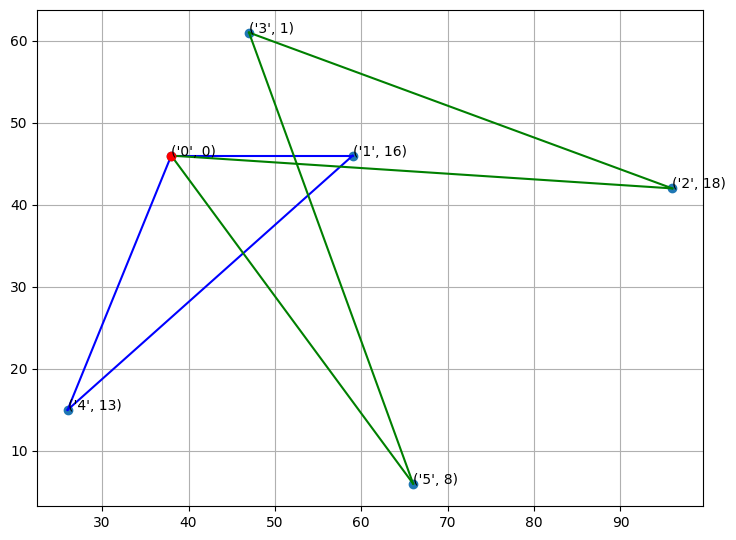

In [486]:
drawRoutes(data, sa.best_solution)

In [3]:
import matplotlib.pyplot as plt
def drawRoutes(data, routes):
    plt.rcParams["figure.figsize"] = [7.50, 5.50]
    plt.rcParams["figure.autolayout"] = True

    x = []
    y = []
    demand = []

    for i in range (0, len(data)):
        x.append(data[i][1][0])
        y.append(data[i][1][1])
        demand.append(data[i][2])

    plt.scatter(x, y)

    colors = ['b', 'g', 'r', 'c', 'm', 'y']

    idxColor = 0
    for route in routes:
        plt.plot((x[0], x[route[0]]),(y[0], y[route[0]]), c=colors[idxColor % len(colors)])
        for i in np.arange(len(route)-1):

            plt.plot((x[route[i]], x[route[i+1]]),(y[route[i]], y[route[i+1]]), c=colors[idxColor % len(colors)])
        plt.plot((x[0], x[route[i+1]]),(y[0], y[route[i+1]]), c=colors[idxColor])
        idxColor += 1

    i = 0

    for xy in zip(x, y):
        plt.annotate((str(i), demand[i]), xy=xy, )
        i += 1

    plt.plot(x[0], y[0], 'ro', c="r")

    plt.grid()
    plt.show()

In [4]:
def getData(lenData):
    data = []
    for i in np.arange(lenData):
        data.append([])
        data[i].append(-1)
        data[i].append([-1,-1])
        data[i].append(-1)
    
    return data

In [5]:
def convertListCharToString(listChar):
    new = ""
    for x in listChar:
        new += x
    return new
     

with open('./A-n33-k5.txt') as f:
    file = f.readlines()

string = convertListCharToString(file)

stringDimensions = "DIMENSION : "
dimensionsIndex  = string.find(stringDimensions) + len(stringDimensions)
dimension = ""

while(string[dimensionsIndex] != '\n'):
    dimension += string[dimensionsIndex]
    dimensionsIndex += 1

dimension = int(dimension)

data = getData(dimension)

stringCord = "NODE_COORD_SECTION" 

initialIndex = string.find(stringCord) + len(stringCord) + 2

indicator = 0

i = 0
while(string[initialIndex] != 'D'):
    number = ""
    while(ord(string[initialIndex]) != 32 and string[initialIndex] != '\n'):
        number += string[initialIndex]
        initialIndex += 1
    
    if(len(number) > 0):        
        if indicator == 0:
            data[i][0] = (int(number) - 1)
            indicator += 1
        elif indicator == 1:
            data[i][1][0] = int(number)
            indicator += 1      
        elif indicator == 2:
            data[i][1][1] = int(number)
            indicator = 0
            i += 1

    initialIndex +=1

stringCost = "DEMAND_SECTION"
initialIndex = string.find(stringCost) + len(stringCost) + 2

indicator = 0

i = 0
while(string[initialIndex] != 'D'):
    number = ""
    while(ord(string[initialIndex]) != 32 and string[initialIndex] != '\n'):
        number += string[initialIndex]
        initialIndex += 1
    #print(number)
    if(len(number) > 0):        
        if indicator == 0:
            indicator += 1
        elif indicator == 1:
            data[i][2] = int(number)
            indicator = 0     
            i += 1

    initialIndex +=1
print(data)

[[0, [42, 68], 0], [1, [77, 97], 5], [2, [28, 64], 23], [3, [77, 39], 14], [4, [32, 33], 13], [5, [32, 8], 8], [6, [42, 92], 18], [7, [8, 3], 19], [8, [7, 14], 10], [9, [82, 17], 18], [10, [48, 13], 20], [11, [53, 82], 5], [12, [39, 27], 9], [13, [7, 24], 23], [14, [67, 98], 9], [15, [54, 52], 18], [16, [72, 43], 10], [17, [73, 3], 24], [18, [59, 77], 13], [19, [58, 97], 14], [20, [23, 43], 8], [21, [68, 98], 10], [22, [47, 62], 19], [23, [52, 72], 14], [24, [32, 88], 13], [25, [39, 7], 14], [26, [17, 8], 2], [27, [38, 7], 23], [28, [58, 74], 15], [29, [82, 67], 8], [30, [42, 7], 20], [31, [68, 82], 24], [32, [7, 48], 3]]


In [14]:
sa = SAnnealing(domain=((0, 32),), step=0.01, final_temperature=0.01, temperature=10000, alpha=0.95, equilibrium=20, time=0, limited_decimals=20, capacity = 100, data = data)
sa.fit(getAllDistances)

5400 Epoch | Equilibrium 20 | Temperature 0.01 | Actual solution 1851.176349 | Aceptance : 0.00 | Time: 7.3884844112

There are the best routes: [[17, 28, 8, 18, 15, 12], [23, 27, 11, 10, 26, 32, 4, 1, 16], [7, 20, 24, 2, 22], [29, 3, 21, 19, 31, 30], [9, 13, 6, 25, 5, 14]]


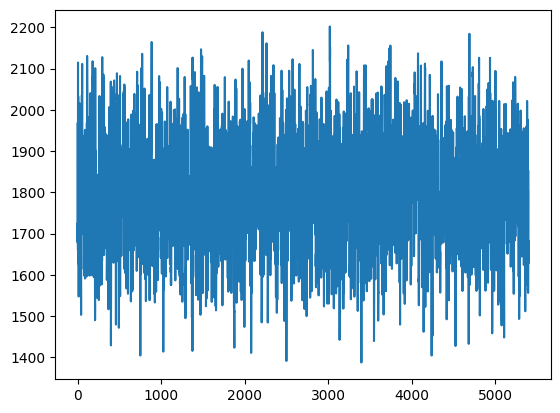

In [15]:
plt.plot(range(len(sa.cost_)), [x[0] for x in sa.cost_ ])
plt.show()

In [498]:
sa.cost_

[(1897.5013943852139, 1),
 (1907.92325802165, 1),
 (1887.786772876575, 1),
 (1827.8636783271693, 1),
 (1749.390114573474, 1),
 (1990.6926232955668, 1),
 (1668.0139643759874, 1),
 (1722.9067886361934, 1),
 (1716.102135888961, 1),
 (1740.3179535844292, 1),
 (1783.7051206055753, 1),
 (1834.5838015427275, 1),
 (1884.3883985181697, 1),
 (1886.7545419062858, 1),
 (1924.107490742023, 1),
 (1925.009607177838, 1),
 (1925.009607177838, 1),
 (1758.1179778216374, 1),
 (1889.9306425717823, 1),
 (2074.2552562715973, 1),
 (2141.373811131145, 1),
 (2150.0246460305934, 1),
 (2157.339199788609, 1),
 (2166.619615587314, 1),
 (1828.4805627685378, 1),
 (1915.1166959458385, 1),
 (1930.4085208644499, 1),
 (1979.7457558174115, 1),
 (1728.4571382774923, 1),
 (1785.0479882058064, 1),
 (1817.6075207917615, 1),
 (2088.7860368338943, 1),
 (1602.6235811726501, 1),
 (1776.836602909566, 1),
 (1762.7338107380033, 1),
 (1696.3091862271112, 1),
 (1631.7763237453914, 1),
 (1881.507718913998, 1),
 (1859.7352069089952, 1),

/var/folders/yv/xlbmlrh90c7bcl6zn1k7n12w0000gn/T/ipykernel_8809/3810908170.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x[0], y[0], 'ro', c="r")


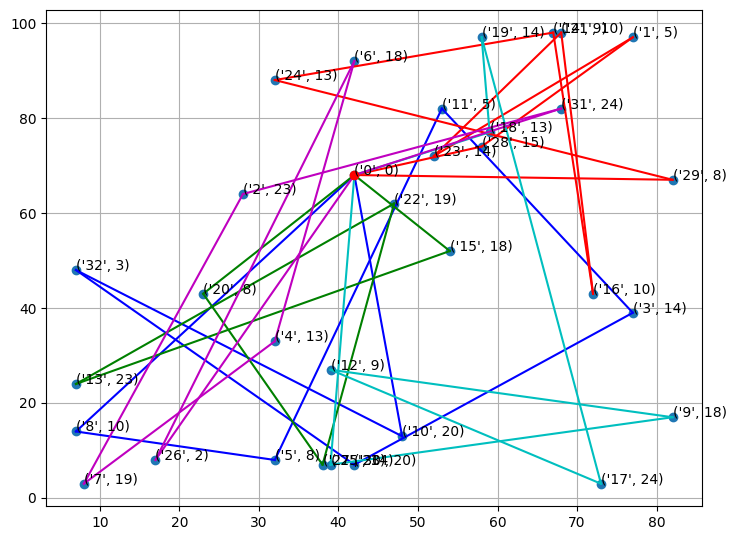

In [497]:
drawRoutes(data, sa.best_solution)